In [2]:
#Packages and authentication
require(twitteR)
require(RSQLite)
require(dismo)
require(maps)
require(ggplot2)
require(XML)


con_k<- 'I0z7AKEkEgo2g1DCsRrG6UR9t'
con_s<- 'KUHwwrOxbGU74MlayHJyUdttCWqlbTgWLx9XMxuGowhMYZb8Se'
acc_tok<- '399497071-qEpvCQC3OxJxflExP8NNGfmqYcLxvrfBFNPHTw4R'
acc_s<-'lHSwVVvytEO87w4i2QsaOjiAkKHudRPRJ8tZ84V3Gywen'

setup_twitter_oauth(con_k,con_s,acc_tok,acc_s)

Loading required package: twitteR
Loading required package: RSQLite
Loading required package: dismo
Loading required package: raster
Loading required package: sp
Loading required package: maps
Loading required package: ggplot2
Loading required package: XML


[1] "Using direct authentication"


In [3]:
#Searching Twitter
tweets <- searchTwitter('Obama from:realDonaldTrump', n=50)
head(tweets)
head(strip_retweets(tweets, strip_manual=TRUE, strip_mt=TRUE))


Warning message in doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, :
"50 tweets were requested but the API can only return 2"

[[1]]
[1] "realDonaldTrump: 'Trump signs bill undoing Obama coal mining rule' https://t.co/yMfT5r5RGh"

[[2]]
[1] "realDonaldTrump: Crimea was TAKEN by Russia during the Obama Administration. Was Obama too soft on Russia?"


[[1]]
[1] "realDonaldTrump: 'Trump signs bill undoing Obama coal mining rule' https://t.co/yMfT5r5RGh"

[[2]]
[1] "realDonaldTrump: Crimea was TAKEN by Russia during the Obama Administration. Was Obama too soft on Russia?"


In [4]:
#Looking at users
crantastic <- getUser('realDonaldTrump')
crantastic$getDescription()
crantastic$getFollowersCount()
crantastic$getFriends(n=5)
crantastic$getFavorites(n=5)


[1] "45th President of the United States of America"

[1] 25158485

$`471672239`
[1] "KellyannePolls"

$`20733972`
[1] "Reince"

$`322293052`
[1] "RealRomaDowney"

$`720293443260456960`
[1] "Trump"

$`2325495378`
[1] "TrumpGolf"


[[1]]
[1] "IvankaTrump: 2016 has been one of the most eventful and exciting years of my life. I wish you peace, joy, love and laughter. Hap https://t.co/A1I3tvTySZ"

[[2]]
[1] "DonaldJTrumpJr: FINAL PUSH! Eric and I doing dozens of radio interviews. We can win this thing! GET OUT AND VOTE! #MAGA #ElectionDay https://t.co/dYcxRCBQUd"

[[3]]
[1] "DanScavino: INDIANA #TrumpTrain<ed><U+00A0><U+00BD><ed><U+00BA><U+0082><ed><U+00A0><U+00BD><ed><U+00B2><U+00A8><ed><U+00A0><U+00BC><ed><U+00B7><U+00BA><ed><U+00A0><U+00BC><ed><U+00B7><U+00B8><ed><U+00A0><U+00BC><ed><U+00B7><U+00BA><ed><U+00A0><U+00BC><ed><U+00B7><U+00B8>\ncc: @mike_pence @marc_lotter https://t.co/fxvQ43k2im"

[[4]]
[1] "mike_pence: Congrats to my running mate @realDonaldTrump on a big debate win! Proud to stand with you as we #MAGA."

[[5]]
[1] "TeamTrump: It's hard to fight terrorism when you're making cash payments to the world's LARGEST state sponsor of TERROR. Under https://t.co/GPSkdoiiRC"


In [5]:
#Conversion to data frames
df <- twListToDF(tweets)
head(df)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @ma_salmon: New #rstats post! A plot against the CatterPlots complot https://t.co/whBvDMOZSK <ed><U+00A0><U+00BD><ed><U+00B8><U+00BC> https://t.co/u1Jujl9DCR,FALSE,0,NA,2017-02-18 16:16:51,FALSE,NA,832987249474170880,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",cervelle,21,TRUE,FALSE,NA,NA
RT @Rbloggers: A plot against the CatterPlots complot https://t.co/HEe9dfwGpJ #rstats #DataScience,FALSE,0,NA,2017-02-18 16:15:58,FALSE,NA,832987029768118272,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",isai_sg,6,TRUE,FALSE,NA,NA
RT @Rbloggers: Accessing MSSQL Server with R (RSQLServer with dplyr) https://t.co/u7Yhgg4T6i #rstats #DataScience,FALSE,0,NA,2017-02-18 16:02:36,FALSE,NA,832983663562387456,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Iftisaragmailc1,8,TRUE,FALSE,NA,NA
Heads or Tails? Visualizing Stirling’s Approximation W/ Highcharts https://t.co/4ovWAexoyr #rstats #3rdparty via @aschinchon,FALSE,0,NA,2017-02-18 15:59:06,FALSE,NA,832982783324729345,NA,"<a href=""https://www.socialjukebox.com"" rel=""nofollow"">The Social Jukebox</a>",Highcharts,0,FALSE,FALSE,NA,NA
I will speak at @sqlnexus about #DataViz with the help of #RStats https://t.co/y1taS2UwqE #sqlnexus,FALSE,0,NA,2017-02-18 15:58:26,FALSE,NA,832982614474645505,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",MEhrenmueller,0,FALSE,FALSE,NA,NA
RT @ma_salmon: New #rstats post! A plot against the CatterPlots complot https://t.co/whBvDMOZSK <ed><U+00A0><U+00BD><ed><U+00B8><U+00BC> https://t.co/u1Jujl9DCR,FALSE,0,NA,2017-02-18 15:57:42,FALSE,NA,832982433205202944,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",JeanManguy,21,TRUE,FALSE,NA,NA


In [9]:
#Database persistence
sql_lite_file = tempfile()
register_sqlite_backend(sql_lite_file)
store_tweets_db(tweets)
from_db = load_tweets_db()
head(from_db)

[1] TRUE

[[1]]
[1] "cervelle: RT @ma_salmon: New #rstats post! A plot against the CatterPlots complot https://t.co/whBvDMOZSK <ed><U+00A0><U+00BD><ed><U+00B8><U+00BC> https://t.co/u1Jujl9DCR"

[[2]]
[1] "isai_sg: RT @Rbloggers: A plot against the CatterPlots complot https://t.co/HEe9dfwGpJ #rstats #DataScience"

[[3]]
[1] "Iftisaragmailc1: RT @Rbloggers: Accessing MSSQL Server with R (RSQLServer with dplyr) https://t.co/u7Yhgg4T6i #rstats #DataScience"

[[4]]
[1] "Highcharts: Heads or Tails? Visualizing Stirlings Approximation W/ Highcharts https://t.co/4ovWAexoyr #rstats #3rdparty via @aschinchon"

[[5]]
[1] "MEhrenmueller: I will speak at @sqlnexus about #DataViz with the help of #RStats https://t.co/y1taS2UwqE #sqlnexus"

[[6]]
[1] "JeanManguy: RT @ma_salmon: New #rstats post! A plot against the CatterPlots complot https://t.co/whBvDMOZSK <ed><U+00A0><U+00BD><ed><U+00B8><U+00BC> https://t.co/u1Jujl9DCR"


In [5]:
#Timelines
cran_tweets <- userTimeline('realDonaldTrump')
cran_tweets[1:5]
cran_tweets_large <- userTimeline('realDonaldTrump', n=100)
length(cran_tweets_large)

[[1]]
[1] "realDonaldTrump: Getting ready to leave for Melbourne, Florida. See you all soon!"

[[2]]
[1] "realDonaldTrump: Will be having many meetings this weekend at The Southern White House. Big 5:00 P.M. speech in Melbourne, Florida. A lot to talk about!"

[[3]]
[1] "realDonaldTrump: Don't believe the main stream (fake news) media.The White House is running VERY WELL. I inherited a MESS and am in the process of fixing it."

[[4]]
[1] "realDonaldTrump: Looking forward to the Florida rally tomorrow. Big crowd expected!"

[[5]]
[1] "realDonaldTrump: \"One of the most effective press conferences I've ever seen!\" says Rush Limbaugh. Many agree.Yet FAKE MEDIA  calls it differently! Dishonest"


[1] 99

In [8]:
#Trends
avail_trends = availableTrendLocations()
head(avail_trends)
close_trends = closestTrendLocations(-12.8, -41.1)
head(close_trends)
trends = getTrends(3444)
head(trends)

name,country,woeid
Worldwide,,1
Winnipeg,Canada,2972
Ottawa,Canada,3369
Quebec,Canada,3444
Montreal,Canada,3534
Toronto,Canada,4118


name,country,woeid
Salvador,Brazil,455826


name,url,query,woeid
#TrumpRally,http://twitter.com/search?q=%23TrumpRally,%23TrumpRally,3444
2018 Memorial Cup,http://twitter.com/search?q=%222018+Memorial+Cup%22,%222018+Memorial+Cup%22,3444
#endirectdelunivers,http://twitter.com/search?q=%23endirectdelunivers,%23endirectdelunivers,3444
#NationalDrinkWineDay,http://twitter.com/search?q=%23NationalDrinkWineDay,%23NationalDrinkWineDay,3444
#MissBiopharma17,http://twitter.com/search?q=%23MissBiopharma17,%23MissBiopharma17,3444
Fedor,http://twitter.com/search?q=Fedor,Fedor,3444


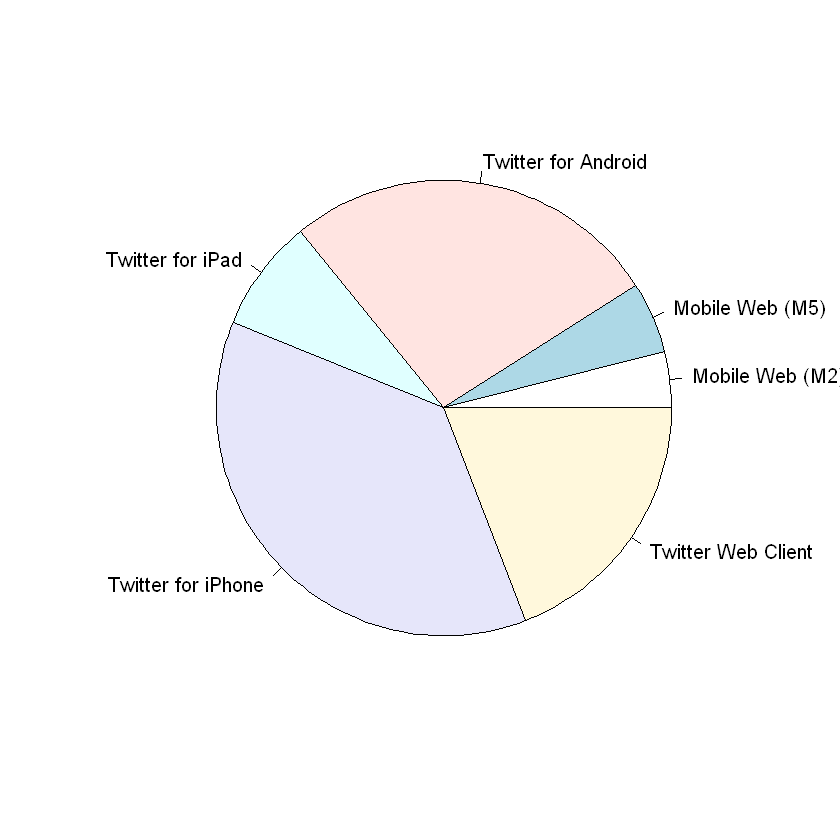

In [9]:
#simple example
r_tweets <- searchTwitter("Obama", n=300)
sources <- sapply(r_tweets, function(x) x$getStatusSource())
sources <- gsub("</a>", "", sources)
sources <- strsplit(sources, ">")
sources <- sapply(sources, function(x) ifelse(length(x) > 1, x[2], x[1]))
source_table = table(sources)
pie(source_table[source_table > 10])